# Generate molecules. Export molecules into csv files



**Codes in this notebook are created mainly by Haotian Cui, and with minor adaptation by Gen Li**

Ps:Each block of code with no additional comments for modification is executed by clicking the Run button to the left of the block. THese cells must be executed in order



- Installing the required package



In [4]:
pip install rdkit


Note: you may need to restart the kernel to use updated packages.


- Connect to the gogle drive storage, only by executing this, you can read the file from the google drive

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


- Import required modules and set up the options

In [1]:
import os
import warnings
import numpy as np
import pandas as pd
from pathlib import Path
from typing import Literal

from rdkit import Chem
from rdkit.Chem import AllChem, Descriptors, Draw, rdMolEnumerator
from rdkit.Chem.Draw import IPythonConsole, rdMolDraw2D
from rdkit.Chem.Draw import MolDrawing
from rdkit.Chem import PandasTools
from rdkit.Chem.Scaffolds import MurckoScaffold
from pandas.errors import SettingWithCopyWarning
from rdkit.Chem.EnumerateStereoisomers import EnumerateStereoisomers

IPythonConsole.ipython_useSVG = True
# support display images in pandas dataframe
PandasTools.RenderImagesInAllDataFrames(images=True)

warnings.simplefilter(action='ignore', category=SettingWithCopyWarning)

### 1. read 37 raw smiles from csv

In [2]:
def show_atom_number(
    mol, label: Literal["atomLabel", "molAtomMapNumber", "atomNote"] = "atomNote"
):
    for atom in mol.GetAtoms():
        atom.SetProp(label, str(atom.GetIdx()))
    return mol

- **Need to change the SMILES string for the core as you need**

In [ ]:
# define core smile string
core_smiles = "NCC(N)=O"  # In the example, all four components are connected at N0, N1, C2, N3


- **Please change the position for attachments**




In [6]:
# define the postion in the core for the attachment of components
core_A_pos = 0  # the position in core to attach component A, R1-NH2
core_B_pos = 1  # the position in core to attach component B, R2-CHO
core_C_pos = 3  # the position in core to attach component C, R3-NC

- Display the molecule image of the core

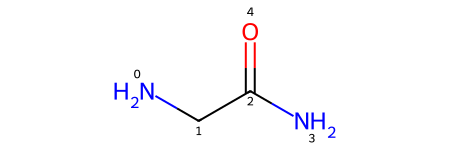

In [5]:
core_mol = Chem.MolFromSmiles(core_smiles) # Convert smile strings to rdkit molecule
core_num_atoms = core_mol.GetNumAtoms() # Get the atom numbers
show_atom_number(core_mol)

-  **Define the path to the .csv file for all components, which is the csv file uploaded**

In [12]:
data_file = Path("/Users/yuexu/Documents/GitHub/Agiledataset/AGILE_1200_SMILES_Compontents.csv") # Please change this to your path of the .csv file for all components, the format of the file need to follow some requirments

In [11]:
# show the dataframe read in
mol_df = pd.read_csv(data_file)

mol_df

,ID,Name,SMILES
0,A1,NaN,CN(C)CCN
1,A2,NaN,NCCCN1CCCC1
2,A3,NaN,CCN(CC)CCCN
3,A4,NaN,CCN(CCN)CC
4,A5,NaN,NCCN(CCN)CCN
5,A6,NaN,CN(C)CCCN
6,A7,NaN,NCCCN1CCOCC1
7,A8,NaN,CCCCN(CCCC)CCCN
8,A9,NaN,CC1=NN(C)C(N)=C1
9,A10,NaN,NCCN1CCCC1


- Calculate the Molecular weight of each molecule

,ID,Name,SMILES,mol,MW
0,A1,NaN,CN(C)CCN,,88.154
1,A2,NaN,NCCCN1CCCC1,,128.219
2,A3,NaN,CCN(CC)CCCN,,130.235
3,A4,NaN,CCN(CCN)CC,,116.208
4,A5,NaN,NCCN(CCN)CCN,,146.238

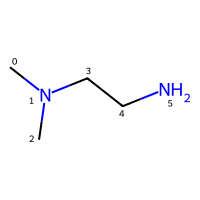
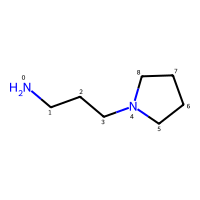
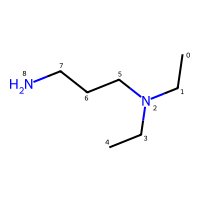
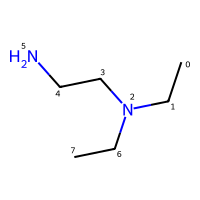
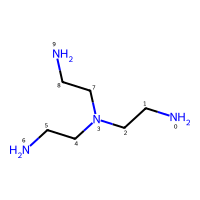

In [13]:
assert len(mol_df.dropna(subset=["SMILES"]).drop_duplicates(subset=["SMILES"])) == len(mol_df)

# add a column to store the molecule object
mol_df["mol"] = mol_df["SMILES"].apply(Chem.MolFromSmiles).apply(show_atom_number)

# add a column to store the molecular weight
mol_df["MW"] = mol_df["mol"].apply(Descriptors.MolWt)

mol_df.head()


,ID,Name,SMILES,mol,MW
0,A1,NaN,CN(C)CCN,,88.154
1,A2,NaN,NCCCN1CCCC1,,128.219
2,A3,NaN,CCN(CC)CCCN,,130.235
3,A4,NaN,CCN(CCN)CC,,116.208
4,A5,NaN,NCCN(CCN)CCN,,146.238

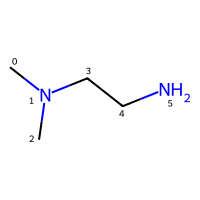
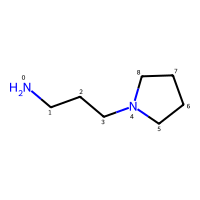
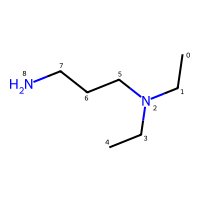
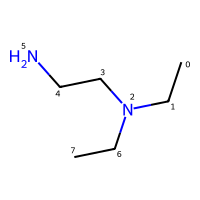
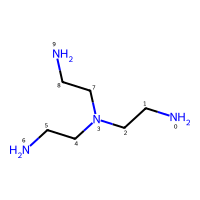

In [14]:
# split the dataframe into four parts based on ID, (1) A*, (2) B*, (3) C*, (4) D*
mol_df["ID"] = mol_df["ID"].str.strip()
mol_df_A = mol_df[mol_df["ID"].str.startswith("A")]
mol_df_B = mol_df[mol_df["ID"].str.startswith("B")]
mol_df_C = mol_df[mol_df["ID"].str.startswith("C")]
mol_df_D = mol_df[mol_df["ID"].str.startswith("D")]

mol_df_A.head()

# After running this, you will have four dataframes that storing each conponents individually

### 2.1. Structurize the df of component A, R1-NH2, break the functional group for the assemble

In [15]:
# extract the -NH2 group from mol_df_A molecules, store the index for them
frag_NH2 = Chem.MolFromSmarts("[NH2]")
mol_df_A["NH2_pos"] = mol_df_A.apply(
    lambda x: x["mol"].GetSubstructMatch(frag_NH2), axis=1
) # only return the first index


# replace the NH2 group with an open end atom *, that can later be connected to other molecules
mol_df_A["main_compoent"] = mol_df_A.apply(
    lambda x: Chem.ReplaceSubstructs(x["mol"], frag_NH2, Chem.MolFromSmiles("*"))[0],
    axis=1,
)
# renumbering
mol_df_A["main_compoent"] = mol_df_A["main_compoent"].apply(show_atom_number)

mol_df_A["main_compoent_SMILES"] = mol_df_A["main_compoent"].apply(Chem.MolToSmiles)
mol_df_A["main_num_atoms"] = mol_df_A["main_compoent"].apply(lambda x: x.GetNumAtoms())

assert len(mol_df_A.drop_duplicates(subset=["main_compoent_SMILES"])) == len(mol_df_A)

,ID,Name,SMILES,mol,MW,NH2_pos,main_compoent,main_compoent_SMILES,main_num_atoms
0,A1,NaN,CN(C)CCN,,88.154,"(5,)",,*CCN(C)C,6
1,A2,NaN,NCCCN1CCCC1,,128.219,"(0,)",,*CCCN1CCCC1,9
2,A3,NaN,CCN(CC)CCCN,,130.235,"(8,)",,*CCCN(CC)CC,9
3,A4,NaN,CCN(CCN)CC,,116.208,"(5,)",,*CCN(CC)CC,8
4,A5,NaN,NCCN(CCN)CCN,,146.238,"(0,)",,*CCN(CCN)CCN,10

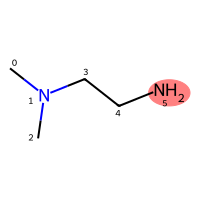
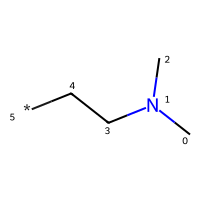
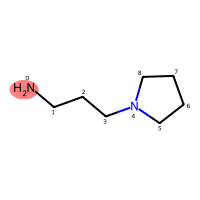
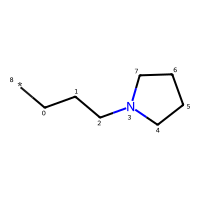
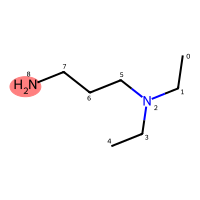
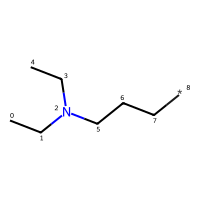
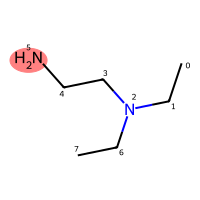
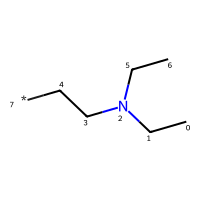
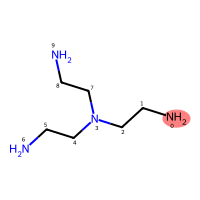
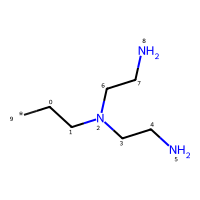

In [16]:
mol_df_A.head()

### 2.2. Structurize the df of component C, R3-NC

In [18]:
# extract the -NC group from mol_df_C molecules
frag_NC = Chem.MolFromSmarts("N#C")

mol_df_C["NC_pos"] = mol_df_C.apply(
    lambda x: x["mol"].GetSubstructMatch(frag_NC), axis=1
)

# replace the NC group with an open end atom *, that can later be connected to other molecules
mol_df_C["main_component"] = mol_df_C.apply(
    lambda x: Chem.ReplaceSubstructs(x["mol"], frag_NC, Chem.MolFromSmiles("*"))[0],
    axis=1,
)

# renumbering
mol_df_C["main_component"] = mol_df_C["main_component"].apply(show_atom_number)

mol_df_C["main_component_SMILES"] = mol_df_C["main_component"].apply(Chem.MolToSmiles)
mol_df_C["main_num_atoms"] = mol_df_C["main_component"].apply(lambda x: x.GetNumAtoms())

assert len(mol_df_C.drop_duplicates(subset=["main_component_SMILES"])) == len(mol_df_C)


,ID,Name,SMILES,mol,MW,NC_pos,main_component,main_component_SMILES,main_num_atoms
32,C1,NaN,CCCCCCCCCCCC[N+]#[C-],,195.350,"(12, 13)",,*CCCCCCCCCCCC,13
33,C2,NaN,CCCCCCCCCCCCCC[N+]#[C-],,223.404,"(14, 15)",,*CCCCCCCCCCCCCC,15
34,C3,NaN,CCCCCCCCCCCCCCCC[N+]#[C-],,251.458,"(16, 17)",,*CCCCCCCCCCCCCCCC,17
35,C4,NaN,CCCCCCCCCCCCCCCCCC[N+]#[C-],,279.512,"(18, 19)",,*CCCCCCCCCCCCCCCCCC,19
36,C5,NaN,CCCCCCCC/C=C\CCCCCCCC[N+]#[C-],,277.496,"(18, 19)",,*CCCCCCCC/C=C\CCCCCCCC,19

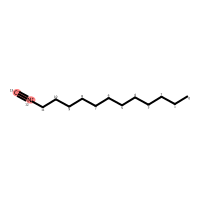
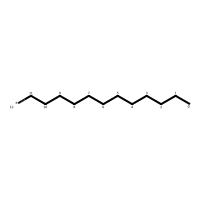
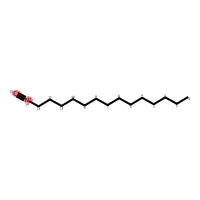
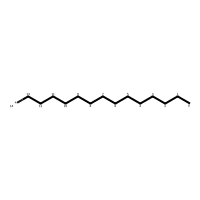
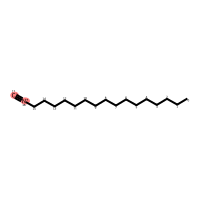
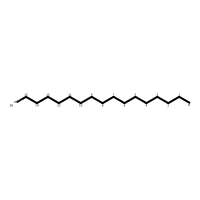
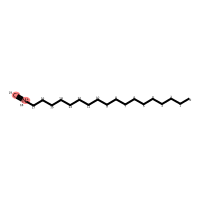
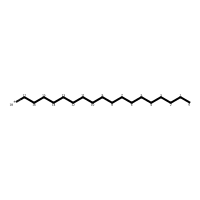
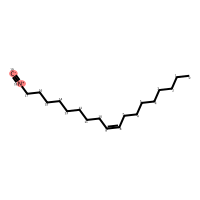
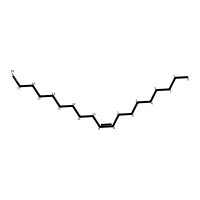

In [24]:
mol_df_C.head()

### 2.3. Structurize the df of component B, R3-CHO

In [25]:
# extract the -CHO group from mol_df_B molecules dd
frag_CHO = Chem.MolFromSmarts("[CX3H1](=O)")

mol_df_B["CHO_pos"] = mol_df_B.apply(
    lambda x: x["mol"].GetSubstructMatch(frag_CHO), axis=1
)


# replace the CHO group with an open end atom *, that can later be connected to other molecules
mol_df_B["main_component"] = mol_df_B.apply(
    lambda x: Chem.ReplaceSubstructs(x["mol"], frag_CHO, Chem.MolFromSmiles("*"))[0],
    axis=1,
)
# renumbering
mol_df_B["main_component"] = mol_df_B["main_component"].apply(show_atom_number)

mol_df_B["main_component_SMILES"] = mol_df_B["main_component"].apply(Chem.MolToSmiles)
mol_df_B["main_num_atoms"] = mol_df_B["main_component"].apply(lambda x: x.GetNumAtoms())

assert len(mol_df_B.drop_duplicates(subset=["main_component_SMILES"])) == len(mol_df_B)

,ID,Name,SMILES,mol,MW,NC_pos,main_compoent,main_compoent_SMILES,main_num_atoms,CHO_pos,main_component,main_component_SMILES
20,B1,NaN,O=C(CCCCCCCC)OCCCCCC=O,,256.386,(),,CCCCCCCCC(=O)OCCCCCC=O,17,"(16, 17)",,*CCCCCOC(=O)CCCCCCCC
21,B2,NaN,CC(CCC(OCCCCCC=O)=O)CCCCC,,270.413,(),,CCCCCC(C)CCC(=O)OCCCCCC=O,18,"(11, 12)",,*CCCCCOC(=O)CCC(C)CCCCC
22,B3,NaN,O=C(CCCCCCCCC)OCCCCCC=O,,270.413,(),,CCCCCCCCCC(=O)OCCCCCC=O,18,"(17, 18)",,*CCCCCOC(=O)CCCCCCCCC
23,B4,NaN,O=C(/C=C/CCCCCCC)OCCCCCC=O,,268.397,(),,CCCCCCC/C=C/C(=O)OCCCCCC=O,18,"(17, 18)",,*CCCCCOC(=O)/C=C/CCCCCCC
24,B5,NaN,O=C(/C=C\CCCCCCC)OCCCCCC=O,,268.397,(),,CCCCCCC/C=C\C(=O)OCCCCCC=O,18,"(17, 18)",,*CCCCCOC(=O)/C=C\CCCCCCC

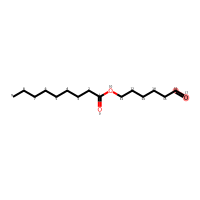
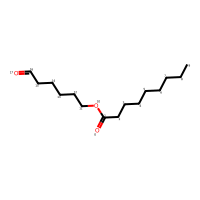
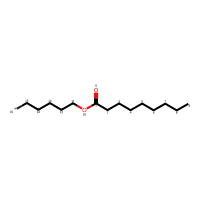
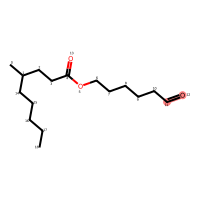
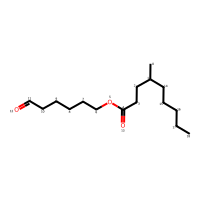
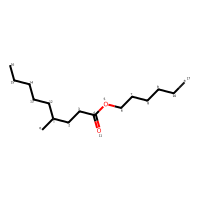
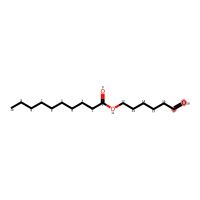
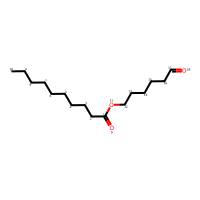
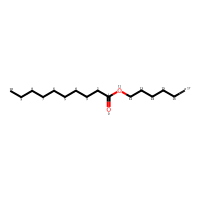
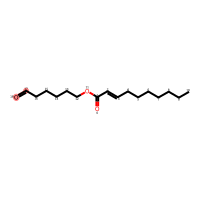
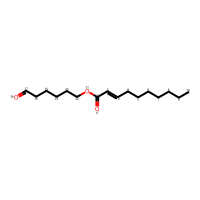
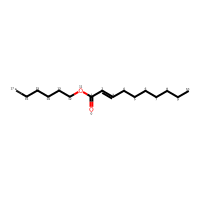
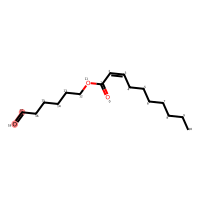
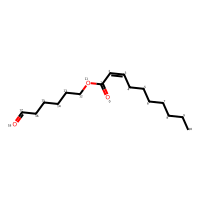
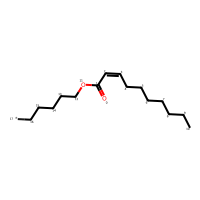

In [26]:
mol_df_B.head()

### 3. combine components

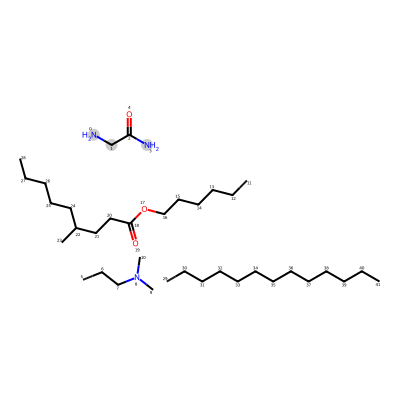

In [29]:
test_A_mol = mol_df_A["main_compoent"].iloc[0]
test_B_mol = mol_df_B["main_component"].iloc[1]
test_C_mol = mol_df_C["main_component"].iloc[0]

test_A_smiles = mol_df_A["main_compoent_SMILES"].iloc[0]
test_B_smiles = mol_df_B["main_component_SMILES"].iloc[1]
test_C_smiles = mol_df_C["main_component_SMILES"].iloc[0]
assert test_A_smiles.startswith("*")
assert test_B_smiles.startswith("*")
assert test_C_smiles.startswith("*")

star_of_A_pos = core_num_atoms
star_of_B_pos = core_num_atoms + test_A_mol.GetNumAtoms()
star_of_C_pos = (
    core_num_atoms
    + test_A_mol.GetNumAtoms()
    + test_B_mol.GetNumAtoms()
)

mol_to_combine = Chem.MolFromSmiles(
    f"{core_smiles}.{test_A_smiles}.{test_B_smiles}.{test_C_smiles} |m:{star_of_A_pos}:{core_A_pos},{star_of_B_pos}:{core_B_pos},{star_of_C_pos}:{core_C_pos}|"
)

Draw.MolToImage(show_atom_number(mol_to_combine), size=(400, 400))

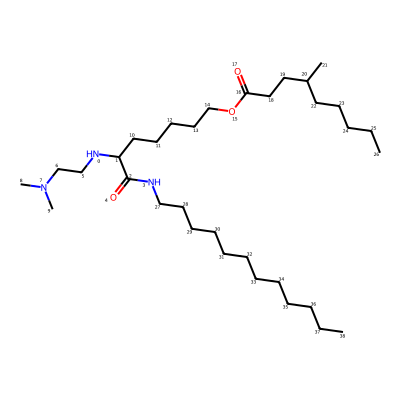

In [30]:
Draw.MolToImage(
    show_atom_number(rdMolEnumerator.Enumerate(mol_to_combine)[0]),
    size=(400, 400),
)



### 4. Generate all molecules and label them

In [49]:
combined_mols = []
count = 0
for i in range(len(mol_df_A)):
    test_A_mol, raw_A_mol, test_A_smiles, raw_A_smiles = mol_df_A.iloc[i][
        ["main_compoent", "mol", "main_compoent_SMILES", "SMILES"]
    ]
    for j in range(len(mol_df_B)):
        test_B_mol, raw_B_mol, test_B_smiles, raw_B_smiles = mol_df_B.iloc[j][
            ["main_component", "mol", "main_component_SMILES", "SMILES"]
        ]
        for k in range(len(mol_df_C)):
            test_C_mol, raw_C_mol, test_C_smiles, raw_C_smiles = mol_df_C.iloc[k][
                ["main_component", "mol", "main_component_SMILES", "SMILES"]
            ]
            if count % 10 == 0:
                print(f"Generating the No.{count} molecule")

            assert test_A_smiles.startswith("*")
            assert test_B_smiles.startswith("*")
            assert test_C_smiles.startswith("*")

            star_of_A_pos = core_num_atoms
            star_of_B_pos = core_num_atoms + test_A_mol.GetNumAtoms()
            star_of_C_pos = (
                core_num_atoms + test_A_mol.GetNumAtoms() + test_B_mol.GetNumAtoms()
            )

            mol_to_combine = Chem.MolFromSmiles(
                f"{core_smiles}.{test_A_smiles}.{test_B_smiles}.{test_C_smiles} |m:{star_of_A_pos}:{core_A_pos},{star_of_B_pos}:{core_B_pos},{star_of_C_pos}:{core_C_pos}|"
            )

            enumerated = rdMolEnumerator.Enumerate(mol_to_combine)
            assert len(enumerated) == 1
            combined_mol = enumerated[0]

            # Generate the label
            label = f"A{i+1}B{j+1}C{k+1}"

            results = {}
            results["id"] = count
            results["label"] = label  # Add the label
            results["combined_mol"] = combined_mol
            results["combined_mol_SMILES"] = Chem.MolToSmiles(combined_mol)

            results["A"] = raw_A_mol
            results["A_smiles"] = raw_A_smiles
            results["B"] = raw_B_mol
            results["B_smiles"] = raw_B_smiles
            results["C"] = raw_C_mol
            results["C_smiles"] = raw_C_smiles

            combined_mols.append(results)
            count = count + 1

Generating the No.0 molecule
Generating the No.10 molecule
Generating the No.20 molecule
Generating the No.30 molecule
Generating the No.40 molecule
Generating the No.50 molecule
Generating the No.60 molecule
Generating the No.70 molecule
Generating the No.80 molecule
Generating the No.90 molecule
Generating the No.100 molecule
Generating the No.110 molecule
Generating the No.120 molecule
Generating the No.130 molecule
Generating the No.140 molecule
Generating the No.150 molecule
Generating the No.160 molecule
Generating the No.170 molecule
Generating the No.180 molecule
Generating the No.190 molecule
Generating the No.200 molecule
Generating the No.210 molecule
Generating the No.220 molecule
Generating the No.230 molecule
Generating the No.240 molecule
Generating the No.250 molecule
Generating the No.260 molecule
Generating the No.270 molecule
Generating the No.280 molecule
Generating the No.290 molecule
Generating the No.300 molecule
Generating the No.310 molecule
Generating the No.3

In [50]:
combined_df = pd.DataFrame(combined_mols)

,id,label,combined_mol,combined_mol_SMILES,A,A_smiles,B,B_smiles,C,C_smiles
0,0,A1B1C1,,CCCCCCCCCCCCNC(=O)C(CCCCCOC(=O)CCCCCCCC)NCCN(C)C,,CN(C)CCN,,O=C(CCCCCCCC)OCCCCCC=O,,CCCCCCCCCCCC[N+]#[C-]
1,1,A1B1C2,,CCCCCCCCCCCCCCNC(=O)C(CCCCCOC(=O)CCCCCCCC)NCCN...,,CN(C)CCN,,O=C(CCCCCCCC)OCCCCCC=O,,CCCCCCCCCCCCCC[N+]#[C-]
2,2,A1B1C3,,CCCCCCCCCCCCCCCCNC(=O)C(CCCCCOC(=O)CCCCCCCC)NC...,,CN(C)CCN,,O=C(CCCCCCCC)OCCCCCC=O,,CCCCCCCCCCCCCCCC[N+]#[C-]

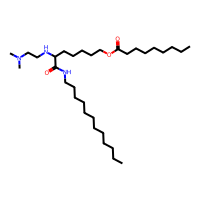
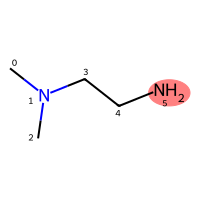
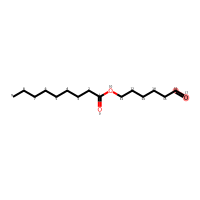
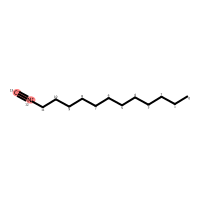
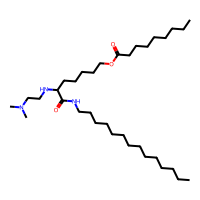
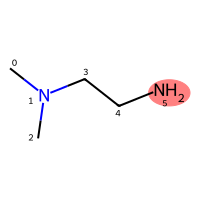
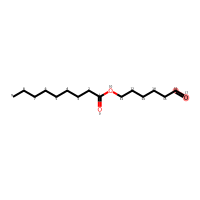
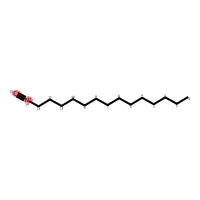
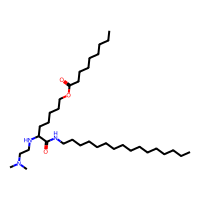
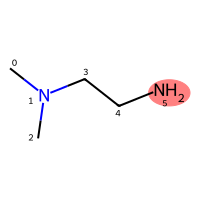
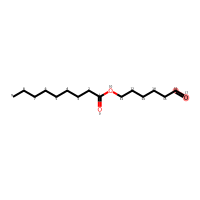
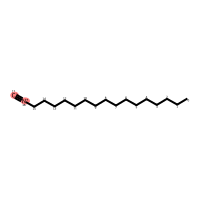

In [51]:
combined_df.head(3)

- **The path in the bracket need to be changed as you need to store the output of the generation**

In [52]:
# only include the columns that can be saved in csv before saving, including the label
combined_df[
    ["id", "label", "combined_mol_SMILES", "A_smiles", "B_smiles", "C_smiles"]
].to_csv("/Users/yuexu/Documents/GitHub/Agiledataset/AGILE_1200_SMILES_RDkit.csv", index=False)